# Mecabによる形態素分析(下処理)とWordCloudによる特徴図示

### 0. MeCab(with neologd)の動作確認

前処理 : "mecab-ipadic-NEologd"(人名や固有名詞などに対応する辞書)をインストールしておく。

Macの場合は、初期設定を変更しないのならpathを指定するだけで使える。このプログラムでは、pathを環境変数に設定しています。  
Windowsの場合は勝手が違うらしいです。参考->https://qd-suriken.com/2020/04/22/widows%E3%81%A7mecabneologd/

In [1]:
import MeCab
import os

path = os.getenv("MECAB_NEO")

# MeCabオブジェクトの生成
tagger = MeCab.Tagger(path)
print(tagger.parse("AtCoderとGitHub"))

AtCoder	名詞,固有名詞,組織,*,*,*,AtCoder,アットコーダー,アットコーダー
と	助詞,並立助詞,*,*,*,*,と,ト,ト
GitHub	名詞,固有名詞,一般,*,*,*,GitHub,ギットハブ,ギットハブ
EOS



文章を分解し、それぞれの単語の区分や読み方などを与えているのがわかる。

In [2]:
#分かち書きで出力する
tagger2 = MeCab.Tagger(path+" "+"-Owakati")
print(tagger2.parse("AtCoderとGitHub"))

AtCoder と GitHub 



## 1. 「名もなき詩」の歌詞を分解し、WordCloudで特徴を図示する

NamonakiUta.txt -> Mr.Childrenの名もなき詩の歌詞が記載されているtxtファイル  
excelファイル等からopenpyxlなどで引っ張ってくる場合、適宜改行コードを取り除くなどの処理が必要。

In [3]:
txt = "NamonakiUta.txt"
with open(txt, mode = "r", encoding="utf-8") as f:
    lyric = f.read()
print(lyric[:15])

ちょっとぐらいの汚れ物ならば



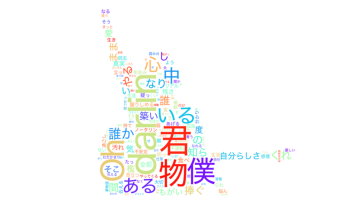

In [4]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

# 形態素分解したnodeを取得する
node = tagger.parseToNode(lyric)

# 条件に合う単語を格納するリスト
word_list = []

# 名詞、形容詞、動詞のみを取得する
while node:
    # node.feautureに品詞の情報が含まれているので抽出
    word_type = node.feature.split(',')[0]
    if (word_type == "名詞" or word_type == "形容詞" or word_type == "動詞"):
        word_list.append(node.surface) # node.surface -> 分解した単語
    node = node.next
    
word_chain = " ".join(word_list)


# maskする画像を指定できる, 出力はmaskする画像の解像度に依存する
mask_array = np.array(Image.open("maskしたい形の画像のpath"))

# ワードクラウド作成
W = WordCloud(width = 1920, height = 1080, 
              background_color = 'white', 
              # 日本語の場合、日本語に対応したフォントのpathを指定
              font_path = '/Library/Fonts/ヒラギノ角ゴシック W4.ttc',
              max_words = 500, 
              regexp = r"[\w']+",  # 1文字の単語を表示させるため
              stopwords = ["ん", "さ"], # 特定の単語を含まないようにできる
              colormap = "rainbow",
              mask = mask_array,
              collocations = False
             ).generate(word_chain)

W.to_file('namonakiUta_wordCloud.png')
plt.imshow(W)
plt.axis('off')
plt.show()

## 2. 任意のアーティストの全ての歌詞を分解し、WordCloudで図示する

noritaka_lyrics.txt -> 飯田徳孝氏の全ての歌詞が記載されているtxtファイル

In [5]:
txt = "noritaka_lyrics.txt"
with open(txt, mode="r", encoding="utf-8") as f:
    lyrics = f.read()

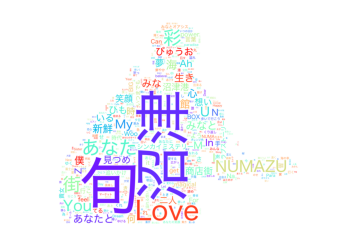

In [6]:
node = tagger.parseToNode(lyrics)

word_list = []

while node:
    word_type = node.feature.split(',')[0]
    if word_type == "名詞" or word_type == "形容詞" or word_type == "動詞":
        word_list.append(node.surface)
    node = node.next

word_chain = " ".join(word_list)

mask_array = np.array(Image.open("Iida_noritaka.jpg"))
# ワードクラウド作成
W = WordCloud(width=1920, height=1080, 
              background_color = 'white', 
              font_path = '/Library/Fonts/ヒラギノ角ゴシック W4.ttc', 
              max_words=500, 
              regexp = r"[\w']+",
              stopwords = ["い", "の", "ん", "A", "La"],
              colormap = "rainbow",
              collocations = False,
              mask = mask_array
             ).generate(word_chain)

W.to_file('Iida_noritaka_WordCloud.png')
plt.imshow(W)
plt.axis('off')
plt.show()

### 名詞のみを抽出してみる

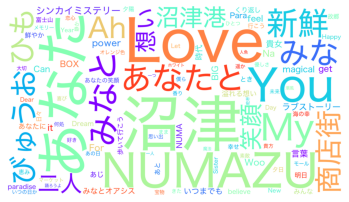

In [7]:
node = tagger.parseToNode(lyrics)
word_list = []

while node:
    word_type = node.feature.split(',')[0]
    if word_type == "名詞":
        word_list.append(node.surface)
    node = node.next

word_chain = " ".join(word_list)

W = WordCloud(width=1920, height=1080, 
              background_color = 'white', 
              font_path = '/Library/Fonts/ヒラギノ角ゴシック W4.ttc', 
              max_words = 100, 
              regexp=r"\w[\w']+",
              stopwords=["ん","La","の","こと","ここ","よう","a","In","is",],
              colormap="rainbow",
              collocations = False
             ).generate(word_chain)

W.to_file('Meishi_noritaka.png')
plt.imshow(W)
plt.axis('off')
plt.show()